In [1]:
import sys
sys.path.insert(0, '../icenumerics')
import icenumerics as ice
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ureg = ice.ureg

from importlib import reload  
import shakti as sha
reload(sha)

from icenumerics.geometry import ordering 

%load_ext autoreload
%autoreload 2

# Building a Shakti lattice

In this script, I will write the functions in order to generate a shakti lattice. 

In [2]:
torad = np.pi/180

# <Parameters from the Cairo lattice>
a = 19.5458
l = 1.37*a

plaquette_cte = 2*l*np.sin(60*torad)
trap_sep = 10

plaquette_cte, (plaquette_cte-2*20)

(46.38041658417427, 6.38041658417427)

In [3]:
trap_sep = 10
part_d = 13*np.sqrt(2)
plaquette_cte = part_d*2+2*trap_sep

centers = [[0,0,0], # <First plaquette>
           [-plaquette_cte/4, plaquette_cte/2,0],
           [plaquette_cte/4, plaquette_cte/2,0],
           [-plaquette_cte/4, -plaquette_cte/2,0],
           [plaquette_cte/4, -plaquette_cte/2,0],

           [plaquette_cte, 0, 0], # <Second plaquette>
           [plaquette_cte/2,plaquette_cte/4, 0],
           [plaquette_cte/2,-plaquette_cte/4, 0],
           [(3/2)*plaquette_cte,plaquette_cte/4, 0],
           [(3/2)*plaquette_cte,-plaquette_cte/4, 0],

           [0,-plaquette_cte, 0], # <Third plaquette>
           [-plaquette_cte/2, -3/4*plaquette_cte,0],
           [-plaquette_cte/2, -5/4*plaquette_cte,0],
           [+plaquette_cte/2, -3/4*plaquette_cte,0],
           [+plaquette_cte/2, -5/4*plaquette_cte,0],
           
           [plaquette_cte, -plaquette_cte,0], # <Fourth plaquette>
           [3/4*plaquette_cte, -plaquette_cte/2,0],
           [5/4*plaquette_cte, -plaquette_cte/2,0],
           [3/4*plaquette_cte, -3/2*plaquette_cte,0],
           [5/4*plaquette_cte, -3/2*plaquette_cte,0],
          ]*ureg.um


directions = [[0,trap_sep*a,0], # <First plaquette>
              [1*a,0,0],
              [1*a,0,0],
              [1*a,0,0],
              [1*a,0,0],
              [trap_sep*a,0,0], # <Second plaquette>
              [0,1*a,0],
              [0,1*a,0],
              [0,1*a,0],
              [0,1*a,0],
              [trap_sep*a,0,0], #  <Third plaquette>
              [0,1*a,0],
              [0,1*a,0],
              [0,1*a,0],
              [0,1*a,0],
              [0,trap_sep*a,0], # <Fourth plaquette>
              [1*a,0,0],
              [1*a,0,0],
              [1*a,0,0],
              [1*a,0,0],
             ]*ureg.um

In [4]:
vertex_centers = np.array([[0, plaquette_cte/2], # 3-fold vertices.
                  [0, -plaquette_cte/2],
                  [plaquette_cte/2,0],
                  [3/2*plaquette_cte,0],
                  [-plaquette_cte/2,-plaquette_cte],
                  [+plaquette_cte/2,-plaquette_cte],
                  [plaquette_cte,-plaquette_cte/2],
                  [plaquette_cte,-3/2*plaquette_cte],
                  [-plaquette_cte/2,plaquette_cte/2], # 4-fold vertices.
                  [plaquette_cte/2, plaquette_cte/2],
                  [-plaquette_cte/2,-plaquette_cte/2],
                  [plaquette_cte/2,-plaquette_cte/2]])

In [5]:
vertex_centers[:,0]

array([  0.        ,   0.        ,  28.38477631,  85.15432893,
       -28.38477631,  28.38477631,  56.76955262,  56.76955262,
       -28.38477631,  28.38477631, -28.38477631,  28.38477631])

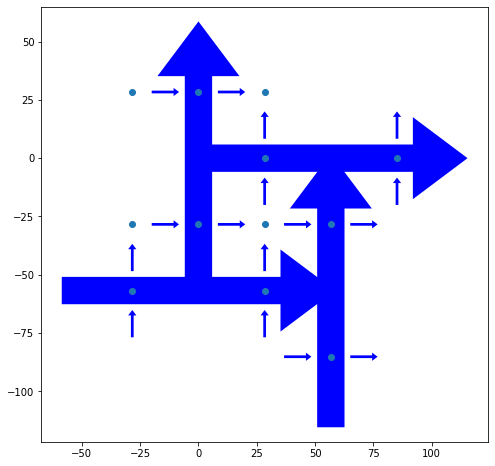

In [6]:
sp = ice.spins(centers = centers, directions = directions)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)
plt.axis('equal')
ax1.plot(vertex_centers[:,0],vertex_centers[:,1],'o')

## Generalizing 

To implement the shakti lattice we create a shakti.py file with the functions that allow to generate and build the lattice.

In [7]:
output = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-10.0"

In [22]:
trap_sep = 10 # Short trap
radius = 5
distance = 3
interparticle_distance = 2*radius + distance # distance among a particle next to the other 
part_d = interparticle_distance*np.cos(np.pi/4) # distance among a particle in front of the other 
plaquette_cte = part_d*4+2*trap_sep

sp = sha.spins()
ureg = ice.ureg
sp.create_lattice(geometry = "shakti",size =[2,2],lattice_constant=plaquette_cte*ureg.um , border="periodic")
sp.order_spins(ordering.random_ordering)

/home/carolina/CairoLattice_ACI_PROJECT/Scripts/shakti.py:251: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new_centers[:,1] = centersY


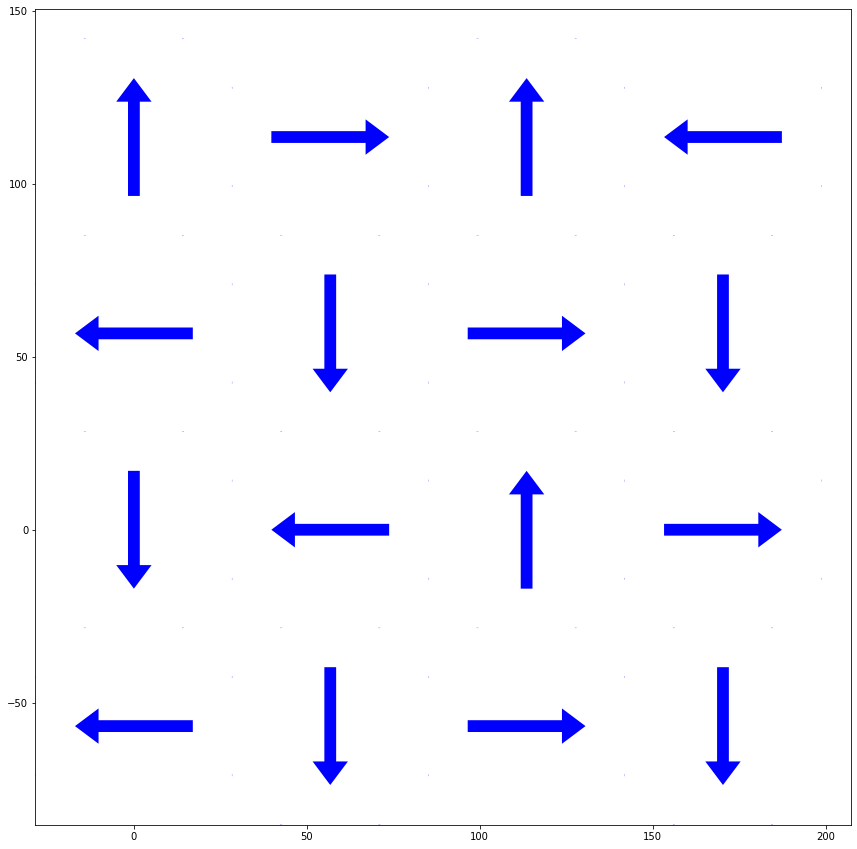

In [23]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
sp.display(ax1)

In [24]:
particle = ice.particle(radius = 5*ureg.um,
             susceptibility = 0.005,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap_short = ice.trap(trap_sep = 10*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

trap_long = ice.trap(trap_sep = (20+13*np.sqrt(2))*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

In [25]:
lattice_constant = 10
traps = []

for s in sp:
    
    if ( s.direction[0].magnitude >= lattice_constant or s.direction[0].magnitude <= -lattice_constant or 
        s.direction[1].magnitude >= lattice_constant or s.direction[1].magnitude <= -lattice_constant):
        
        traps.append(trap_long)
        
    else:
        
        traps.append(trap_short)
        

In [26]:
col = ice.colloidal_ice(sp, particle, traps, height_spread = 0, susceptibility_spread = 0.1)
col.pad_region(50*ureg.um)

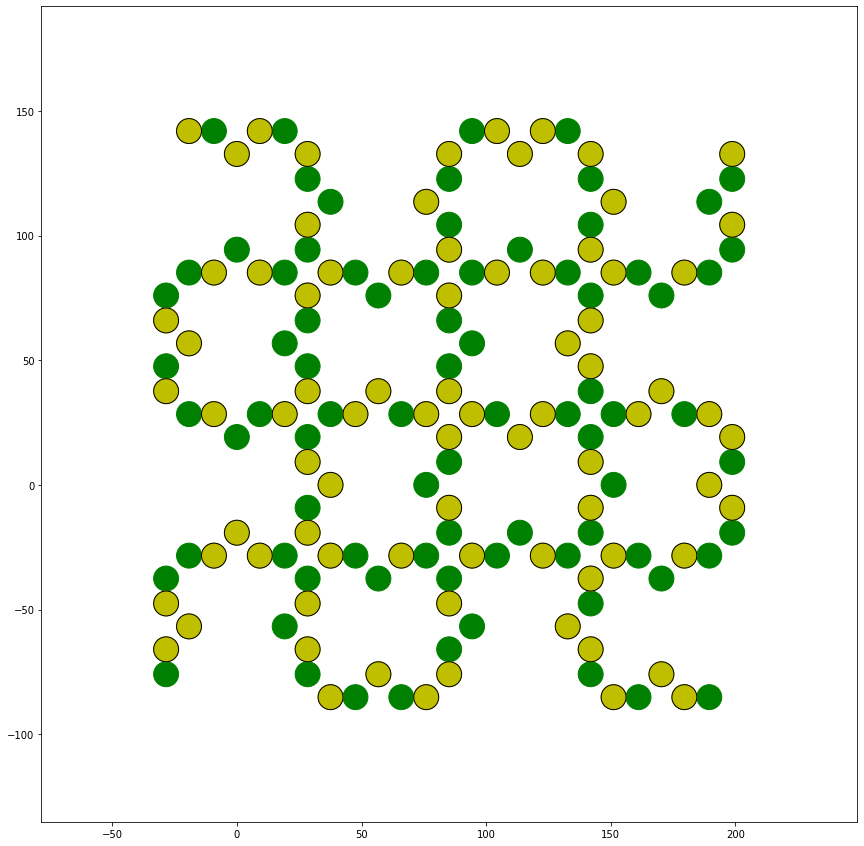

In [27]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))

col.display(ax1)

In [14]:
world = ice.world(
    field = 25*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)
#   boundaries = ["p", "p", "p"])

In [15]:
change_m_time = 2000*ureg.s
total_time = 2500*ureg.s
col.simulate(world,
             name = "shakti_10x10_25mT-2500s",
             include_timestamp = False,
             targetdir = output,
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = total_time,
             output = ["x","y","z","mux","muy","muz"])

scanning file


In [16]:
col.sim.field.fieldz = "(time<2000000000)*v_Bmag*time/%f+(time>=2000000000)*v_Bmag"%(change_m_time.to(ureg.us).magnitude)
col.run_simulation() 

In [17]:
col.load_simulation(slice(0,None,10))

scanning file


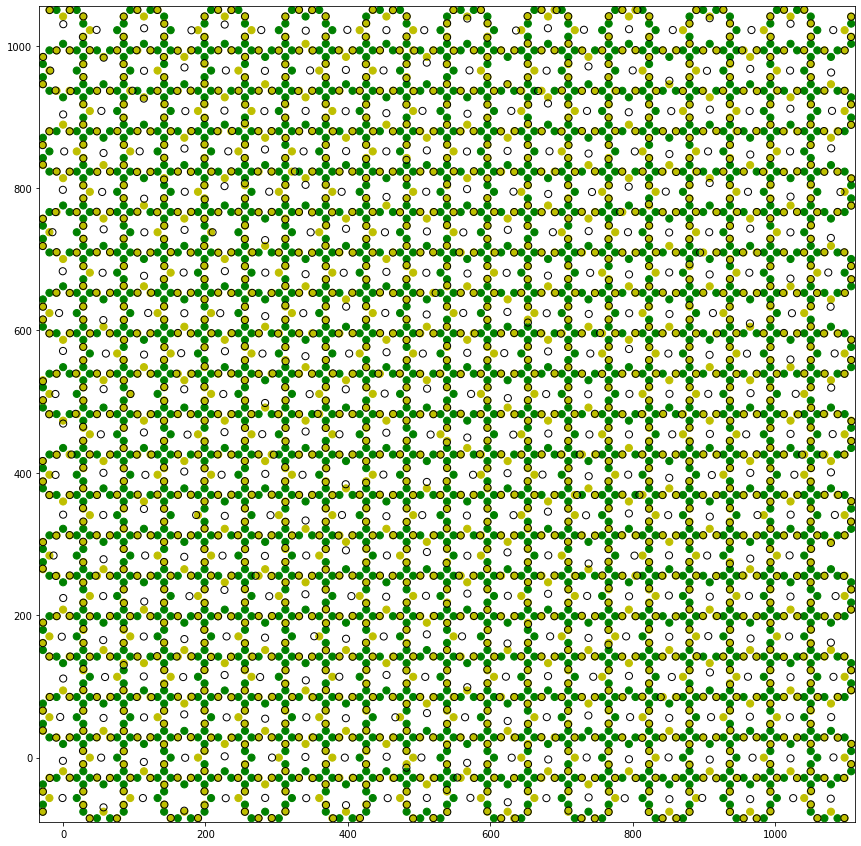

In [18]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
col.set_state_from_frame(-1)

col.display(ax1)

,x,y,coordination,dx,dy
charge,,,,,
-4,57,57,57,57,57
-2,302,302,302,302,302
0,78,78,78,78,78


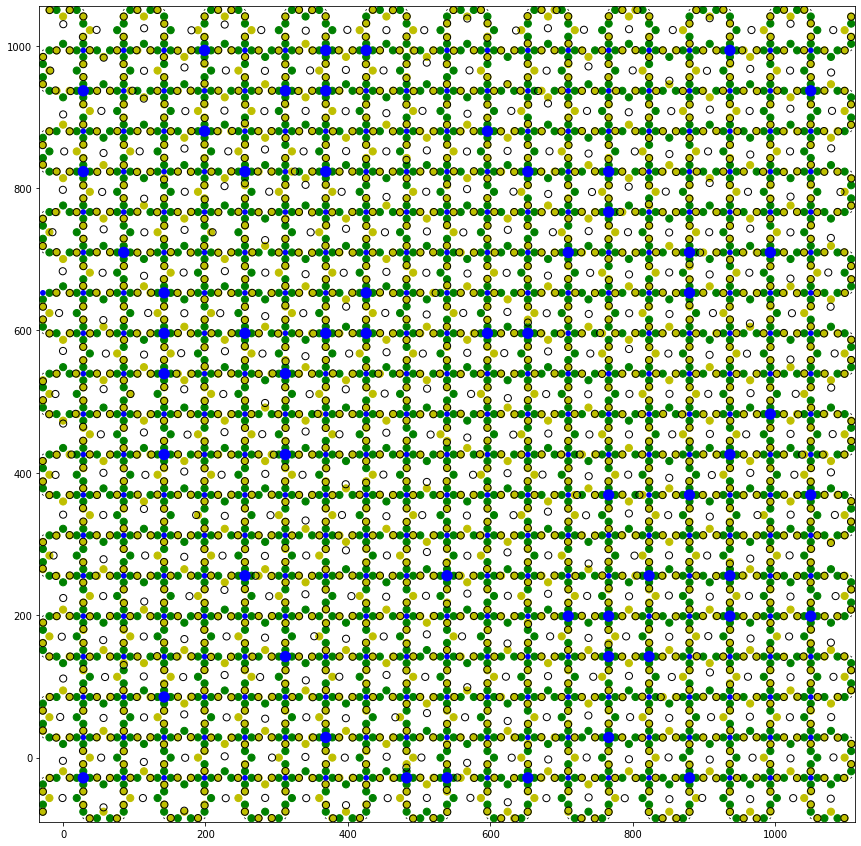

In [19]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
col.set_state_from_frame(-1)
v = v.colloids_to_vertices(col)

col.display(ax1)
v.display(ax1)
v.vertices.groupby('charge').count()

## From here I will use the .dat files extracted from Script-10.1

Instead of using the function ice.vertices() that automatically brings the flux of the program through ice_to_spins(col) and then infer_topology(spins), I will introduce the parameters of vertices() manually. Here the program needs to recive the position of the vertices and the links/spins between this vertices. Those links, or edges, needs to be in the same order as the colloids.

In [20]:
edges_shakti_values = pd.read_csv('edges_shakti_10x10.dat')
vertices = pd.read_csv('vertices_shakti_10x10.dat')

In [21]:
edges_shakti_values[['start','stop']].values

array([[ 119,  115],
       [ 113,  119],
       [ 117,  119],
       ...,
       [ 983,  771],
       [ 984, 1078],
       [1081,  984]])

In [22]:
vertices[["x","y"]].values

array([[ -28.38477631,  -56.76955262],
       [1107.00627612, 1021.85194719],
       [1050.2367235 , 1050.2367235 ],
       ...,
       [ -28.38477631,  936.69761826],
       [ -28.38477631,  823.15851301],
       [ -28.38477631,  766.38896039]])

In [23]:
v_non_inferred = ice.vertices(
    positions = vertices[["x","y"]].values,
    edges = edges_shakti_values[["start","stop"]].values)

In [24]:
v_non_inferred.update_directions(col)

In [25]:
v_non_inferred.classify_vertices(ice.ice_to_spins(col))

In [26]:
a = v_non_inferred.vertices.query('coordination == 2')

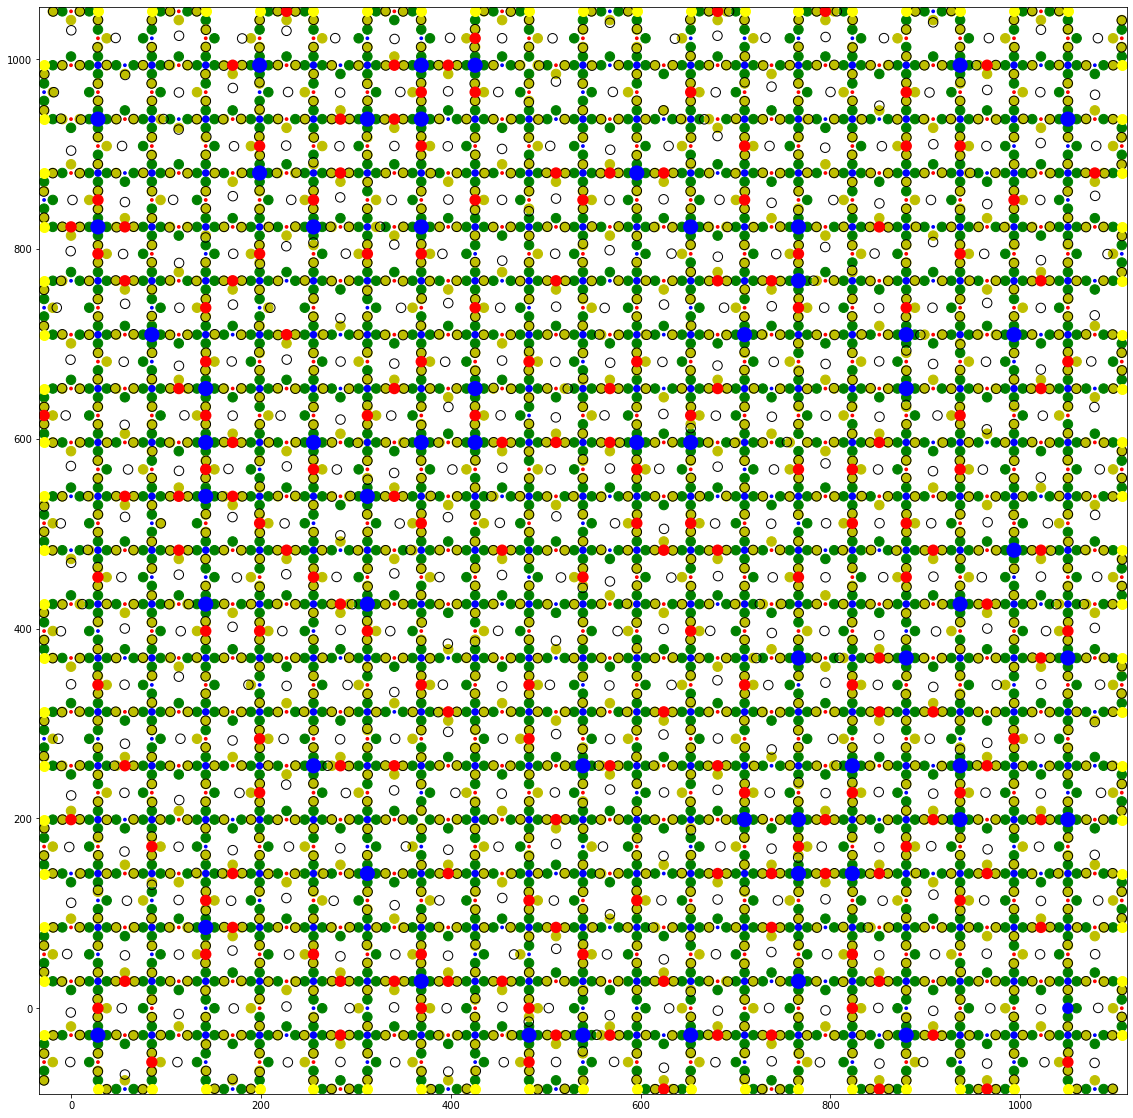

In [27]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))



ax1.plot(a['x'],a['y'], 'o', color = 'yellow', markersize = 10)
col.display(ax1)
v_non_inferred.display(ax1)
plt.savefig('shakti_end')

In [28]:
v_non_inferred.vertices.groupby('charge').count()

,x,y,coordination,dx,dy
charge,,,,,
-4,57,57,57,57,57
-3,1,1,1,1,1
-2,302,302,302,302,302
-1,165,165,165,165,165
0,78,78,78,78,78
1,453,453,453,453,453
3,181,181,181,181,181


# It works!!! 

the function ice.get_ice_trj() in order to extract the col_trj doesn't work. Until I find a way to fix it I will infer the vertices values by using the col object. 

In [29]:
frames = col.trj.index.get_level_values("frame").unique()

In [30]:
frames

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            241, 242, 243, 244, 245, 246, 247, 248, 249, 250],
           dtype='int64', name='frame', length=251)

In [31]:
import tqdm.notebook as tqdm

In [32]:
def generate_dataframe(col):
    
    v_non_inferred.update_directions(col)
    v_non_inferred.classify_vertices(ice.ice_to_spins(col))
    
    return v_non_inferred
    

In [33]:
col.set_state_from_frame(2)

 ...]

In [34]:
v = generate_dataframe(col)

In [35]:
v.vertices.groupby('charge').count().head(9)

,x,y,coordination,dx,dy
charge,,,,,
-4,21,21,21,21,21
-3,96,96,96,96,96
-2,100,100,100,100,100
-1,310,310,310,310,310
0,188,188,188,188,188
1,309,309,309,309,309
2,99,99,99,99,99
3,85,85,85,85,85
4,29,29,29,29,29


In [39]:
import os

v_df = []

for f in tqdm.tqdm(frames[::20]):
    
    print(f)
    
    col.set_state_from_frame(f)
    v = generate_dataframe(col)
    print(v.vertices.groupby('charge').count())
    
    v_df.append(v.vertices.groupby('charge').count())
    
v_df_def = pd.concat(v_df, keys=frames[::20], names = ["frame"])



#Change the folder name

v_df_def.to_csv(os.path.join(output,"vertices_evolution.dat"), sep='\t')

0
          x    y  coordination   dx   dy
charge                                  
-4       21   21            21   21   21
-3       95   95            95   95   95
-2      100  100           100  100  100
-1      311  311           311  311  311
 0      189  189           189  189  189
 1      309  309           309  309  309
 2       98   98            98   98   98
 3       85   85            85   85   85
 4       29   29            29   29   29
20
          x    y  coordination   dx   dy
charge                                  
-4       22   22            22   22   22
-3       95   95            95   95   95
-2       99   99            99   99   99
-1      310  310           310  310  310
 0      188  188           188  188  188
 1      311  311           311  311  311
 2       99   99            99   99   99
 3       84   84            84   84   84
 4       29   29            29   29   29
40
          x    y  coordination   dx   dy
charge                                  
-4      

In [ ]:
v_df_def = pd.concat(v_df, keys=frames[::1], names = ["frame"])

In [ ]:
v_df_def

I don't understand why loop is not working correctly!